# 서바이벌 생존율과 요리 장르의 상관관계 분석

## 분석 목표
- 한식, 중식, 일식, 양식, 디저트, 퓨전 중 라운드 별 생존율이 가장 높은 요리 카테고리 분석

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 한글 폰트 설정 (Windows 환경 가정)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

## 1. 데이터 로드

In [2]:
file_path = '3번문제완성본.csv'
df = pd.read_csv(file_path)

# 데이터 확인
display(df.head())
print(df.info())

,name,food,round,is_winner,is_alive,match_type,how_cook,food_category,ingrediant,temperature,back,an,is_back,is_an,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,그때 명셰프,-,1R,패,탈락,개인전,-,NaN,NaN,NaN,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,김치다이닝,-,1R,패,탈락,개인전,-,NaN,NaN,NaN,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,남해 힙스터,-,1R,패,탈락,개인전,-,NaN,NaN,NaN,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,내장백서,-,1R,패,탈락,개인전,-,NaN,NaN,NaN,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,뉴욕 기사식당,제육볶음 한 상,1R,패,탈락,개인전,볶음,한식,육류,Mix,0,0,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           224 non-null    object 
 1   food           224 non-null    object 
 2   round          224 non-null    object 
 3   is_winner      224 non-null    object 
 4   is_alive       224 non-null    object 
 5   match_type     224 non-null    object 
 6   how_cook       188 non-null    object 
 7   food_category  184 non-null    object 
 8   ingrediant     184 non-null    object 
 9   temperature    184 non-null    object 
 10  back           224 non-null    int64  
 11  an             224 non-null    int64  
 12  is_back        224 non-null    int64  
 13  is_an          202 non-null    float64
 14  Unnamed: 14    10 non-null     object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
 17  Unnamed: 17    0 non-null      float64
 18  Unnamed: 1

## 2. 데이터 전처리
- `food_category`가 결측치인 데이터는 분석에서 제외 (요리 장르 정보가 없는 경우)
- `퓨전음식`을 `퓨전`으로 명칭 통일

In [3]:
# food_category 결측치 제거
df_filtered = df.dropna(subset=['food_category']).copy()

# '퓨전음식' -> '퓨전' 변경
df_filtered['food_category'] = df_filtered['food_category'].replace('퓨전음식', '퓨전')

print('분석 대상 카테고리:', df_filtered['food_category'].unique())

분석 대상 카테고리: ['한식' '퓨전' '일식' '양식' '디저트' '중식']


## 3. 라운드 별 생존율 계산
- 생존 여부(`is_alive`)가 '생존'인 경우를 성공으로 간주하여 비율 계산

In [4]:
# '생존' 여부를 1(생존), 0(탈락/보류)으로 변환
# 분석 기준: 해당 라운드에서 '생존' 판정을 받은 비율
df_filtered['is_survived'] = (df_filtered['is_alive'] == '생존').astype(int)

# 라운드 및 카테고리별 생존율 계산
survival_rate = df_filtered.groupby(['round', 'food_category'])['is_survived'].mean().reset_index()
survival_rate.rename(columns={'is_survived': 'survival_rate'}, inplace=True)

# 백분율로 변환
survival_rate['survival_rate'] = survival_rate['survival_rate'] * 100

display(survival_rate)

,round,food_category,survival_rate
0,1R,디저트,0.000000
1,1R,양식,66.666667
2,1R,일식,60.000000
3,1R,중식,50.000000
4,1R,퓨전,40.000000
5,1R,한식,40.000000
6,2R,양식,0.000000
7,2R,일식,75.000000
8,2R,중식,100.000000
9,2R,퓨전,58.333333


## 4. 결과 시각화

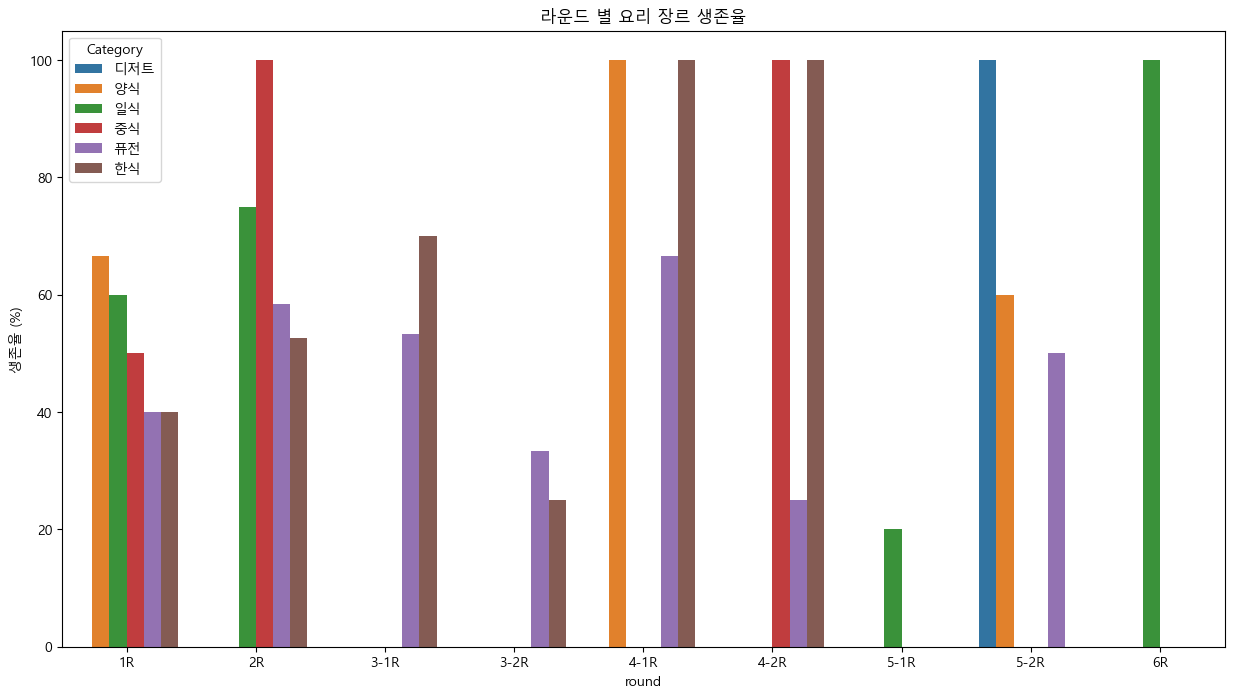

In [5]:
plt.figure(figsize=(15, 8))
sns.barplot(data=survival_rate, x='round', y='survival_rate', hue='food_category')
plt.title('라운드 별 요리 장르 생존율')
plt.ylabel('생존율 (%)')
plt.ylim(0, 105)
plt.legend(title='Category')
plt.show()

## 5. 라운드 별 생존율 1위 카테고리 도출

In [6]:
# 각 라운드 별 생존율이 가장 높은 카테고리 찾기
idx = survival_rate.groupby('round')['survival_rate'].idxmax()
top_survival_categories = survival_rate.loc[idx]

print("=== 라운드 별 생존율 1위 카테고리 ===")
display(top_survival_categories[['round', 'food_category', 'survival_rate']].sort_values(by='round'))

=== 라운드 별 생존율 1위 카테고리 ===


,round,food_category,survival_rate
1,1R,양식,66.666667
8,2R,중식,100.000000
13,3-1R,한식,70.000000
16,3-2R,퓨전,33.333333
18,4-1R,양식,100.000000
22,4-2R,중식,100.000000
26,5-1R,일식,20.000000
29,5-2R,디저트,100.000000
35,6R,일식,100.000000
